In [32]:
import wave
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import math

## Parameters

In [33]:
FRAME_DURATION = 20        # frame duration in ms
INPUT_FILE = 'aba_1.wav'   # file to read from
ZCR_SILENCE_THRESHOLD = 0.5
VOLUME_SILENCE_THRESHOLD = 0.02
LAG = 1

## Functions

In [34]:
def plot(values, y_label, y_lim=None):
    time = np.linspace(0, duration, len(values))

    plt.figure(figsize=(20, 5))
    plt.plot(time, values)
    plt.xlabel('Time (ms)')
    plt.ylabel(str(y_label))

    if (y_lim != None):
        plt.ylim(y_lim)
    
    plt.show()

In [35]:
def plot2(values, y_label,  y_lim, segment_colors):
    time = np.linspace(0, duration, len(all_samples))

    segments = []
    counter = 0
    for frame in values:
        segment = []
        for sample in frame:
            segment.append([time[counter], sample])
            counter += 1
        segments.append(segment)
    
    colors = []
    for isRed in segment_colors:
        colors.append('#d62728' if isRed == True else '#1f77b4')
    lines = LineCollection(segments, colors=colors)

    fig, ax = plt.subplots()
    ax.add_collection(lines)

    ax.autoscale_view()
    ax.figure.set_size_inches(20, 5)

    if (y_lim != None):
        ax.set_ylim(y_lim)
    
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel(y_label)

    plt.show()

In [36]:
def divide_into_chunks(list, chunk_size):
    for i in range(0, len(list), chunk_size):
        yield list[i:i + chunk_size]

## File reading and splitting into frames

In [37]:
with wave.open(INPUT_FILE, 'rb') as wav_file:
    # read all samples into a list
    bytes = wav_file.readframes(wav_file.getnframes())
    sample_rate = float(wav_file.getframerate())
    duration = (wav_file.getnframes() / sample_rate) * 1000
    all_samples = np.frombuffer(bytes, dtype=np.int16) / 32768.0

    # split the audio into frames of specified duration
    frame_size = int(sample_rate * FRAME_DURATION / 1000)
    all_frames = list(divide_into_chunks(all_samples, frame_size))

## Amplitude in time

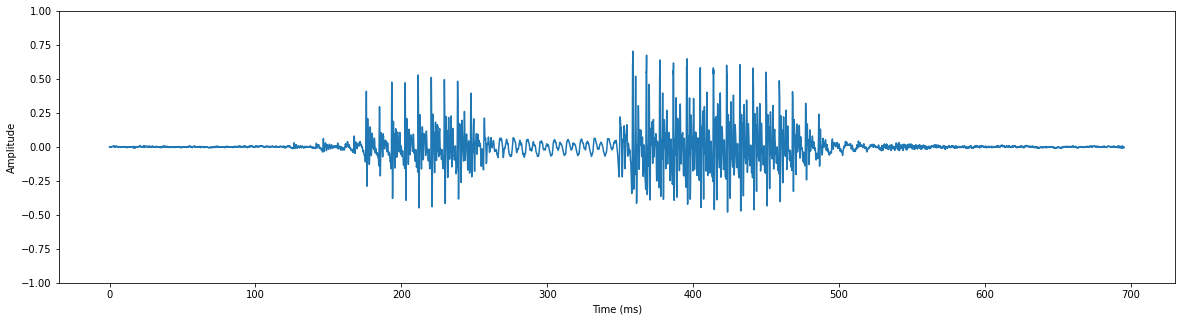

In [38]:
plot(all_samples, 'Amplitude', [-1, 1])

## Volume

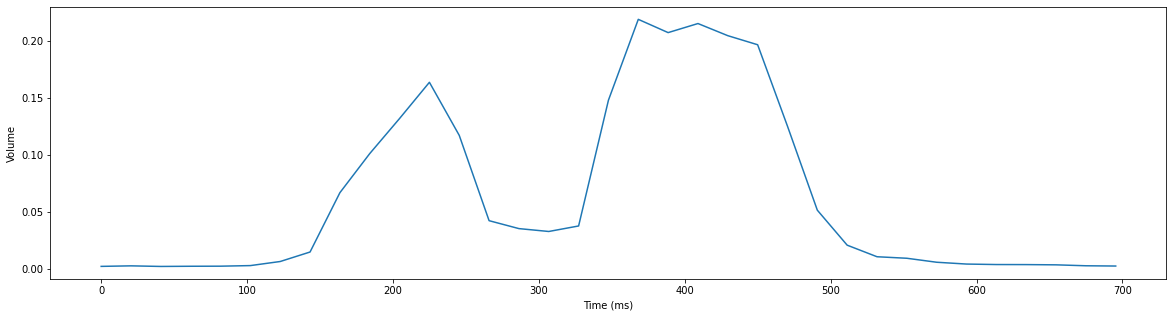

Volume average: 0.06307


In [39]:
volume = []

for frame in all_frames:
    sum = 0
    for sample in frame:
        sum += math.pow(sample, 2)
    volume.append(np.sqrt(sum / frame_size))

plot(volume, 'Volume')
print(f'Volume average: {np.round(np.average(volume), 5)}')

## Short time energy

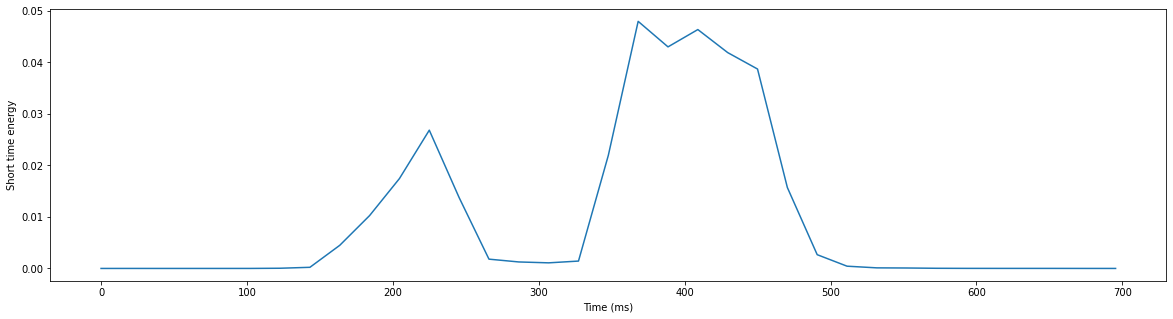

Short time energy average: 0.00965


In [40]:
short_time_energy = np.power(volume, 2)

plot(short_time_energy, 'Short time energy')
print(f'Short time energy average: {np.round(np.average(short_time_energy), 5)}')

## Zero crossing rate

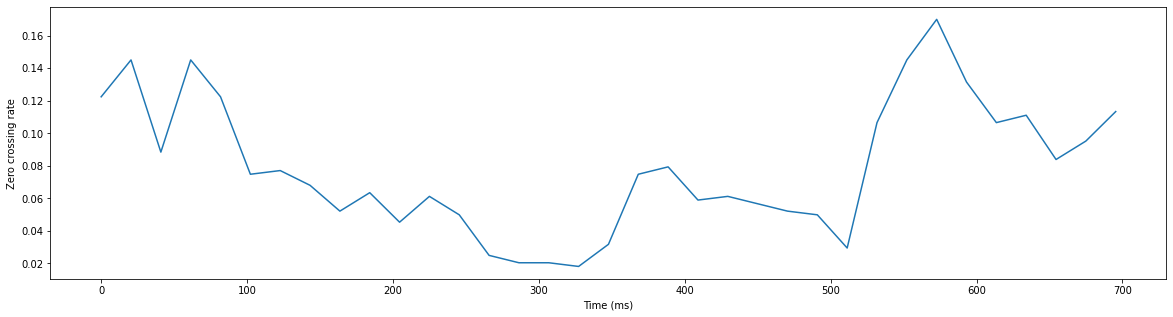

Short time energy average: 0.07878


In [41]:
zero_crossing_rate = []

for frame in all_frames:
    sum = 0
    for i in range(1, len(frame)):
        sum += np.abs(np.sign(frame[i]) - np.sign(frame[i - 1]))
    sum = sum / (2 * frame_size)
    zero_crossing_rate.append(sum)

plot(zero_crossing_rate, 'Zero crossing rate')
print(f'Short time energy average: {np.round(np.average(zero_crossing_rate), 5)}')

## Silence detection

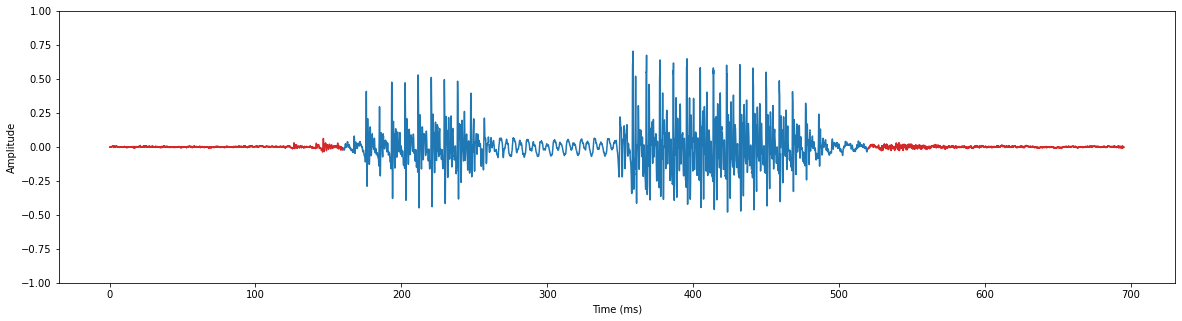

In [42]:
silent_frames = []
for i in range(len(all_frames)):
    if (volume[i] < VOLUME_SILENCE_THRESHOLD and zero_crossing_rate[i] < ZCR_SILENCE_THRESHOLD):
        silent_frames.append(True)
    else:
        silent_frames.append(False)

plot2(all_frames, 'Amplitude', [-1, 1], np.array(silent_frames))

## Fundamental frequency

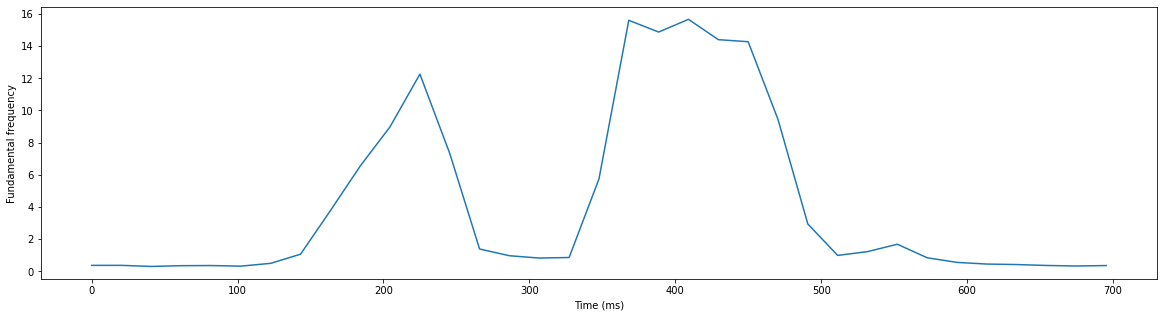

Fundamental frequency average: 4.19329


In [43]:
fundamental_frequencies = []
lag = 1

for frame in all_frames:
    sum = 0
    for j in range(len(frame) - lag - 1):
        sum += np.abs(frame[j + lag] - frame[j])
    fundamental_frequencies.append(sum)

plot(fundamental_frequencies, 'Fundamental frequency')
print(f'Fundamental frequency average: {np.round(np.average(fundamental_frequencies), 5)}')